In [17]:
import sys
import numpy as np
import pandas as pd
import altair as alt
sys.path.append('../readers')
from loadGhGraphs import loadGhGraphs

from trussViz2D import plotTruss
from PIL import Image

## Load data

In [2]:
doeFile = "C:/Users/ewhalen/OneDrive - Massachusetts Institute of Technology/research/data/trusses/EW/v1.3/design_5_N_1000.csv"
allGraphs = loadGhGraphs(doeFile, NUM_DV=5)
maxes = [max(np.abs(graph.y.numpy().flatten())) for graph in allGraphs]
df = pd.DataFrame(maxes, columns=['Max displacement'])
display(df.describe())
df['Percentile'] = df['Max displacement'].rank(pct=True)
df = df.sort_values('Percentile')
display(df)

,Max displacement
count,1000.000000
mean,0.172328
std,1.564701
min,0.011655
25%,0.028406
50%,0.044967
75%,0.080447
max,37.759663


,Max displacement,Percentile
308,0.011655,0.001
585,0.011919,0.002
307,0.012246,0.003
715,0.012440,0.004
858,0.012454,0.005
...,...,...
752,3.322379,0.996
115,4.779472,0.997
800,16.734388,0.998
931,26.441296,0.999


In [3]:
alt.Chart(df.reset_index()).mark_circle().encode(
    x=alt.X('Max displacement:Q', scale=alt.Scale(type='log')),
    y='Percentile:Q',
    tooltip='index:N')

alt.Chart(...)

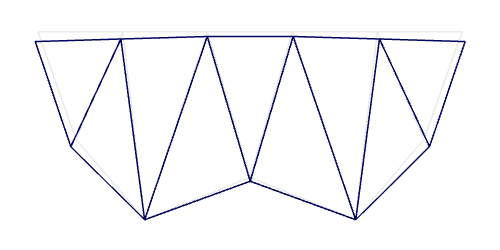

In [4]:
plotTruss(allGraphs[308], showPointLabels=False, showDeformed=True, defScale=100, showUndeformed=True, prediction=None)

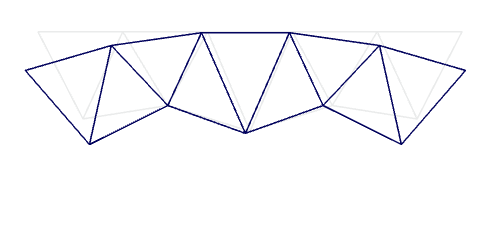

In [5]:
plotTruss(allGraphs[20], showPointLabels=False, showDeformed=True, defScale=100, showUndeformed=True, prediction=None)

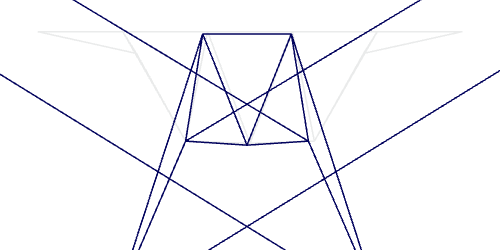

In [6]:
plotTruss(allGraphs[885], showPointLabels=False, showDeformed=True, defScale=100, showUndeformed=True, prediction=None)

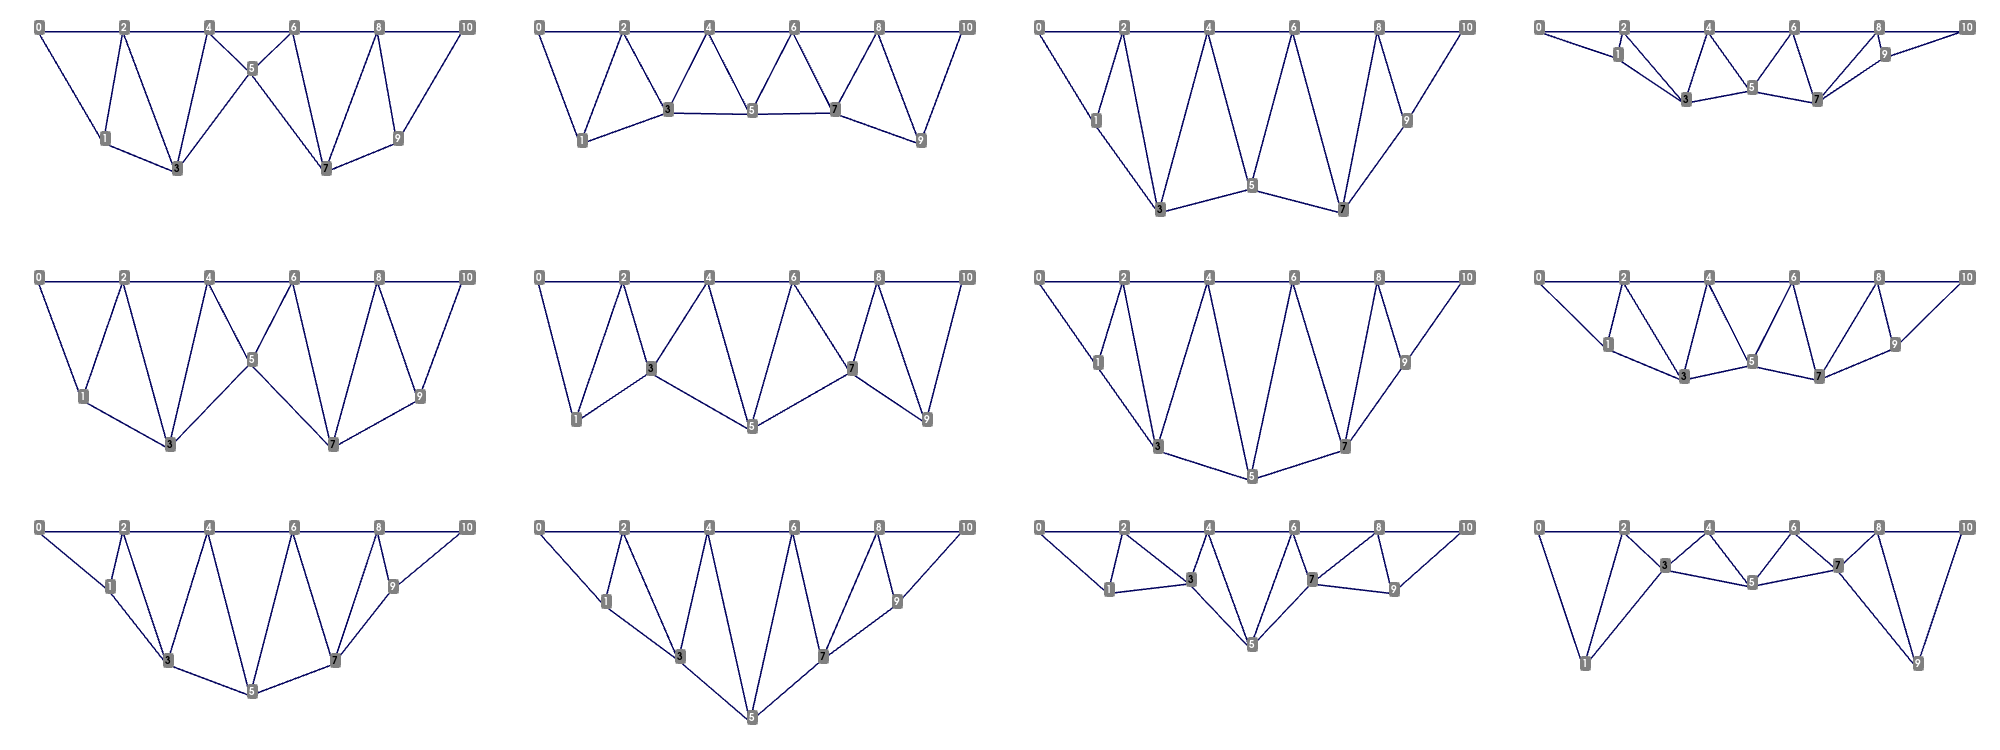

In [7]:
imgList = [plotTruss(g, screenshot=True) for g in allGraphs[:12]]
numCols = 4
numRows = int(np.ceil(len(imgList)/numCols))
h, w, _ = imgList[0].shape
tiledImg = np.empty((h*numRows, w*numCols, 4), dtype='uint8')
for row in range(numRows):
    for col in range(numCols):
        tiledImg[row*h:(row+1)*h,col*w:(col+1)*w] = imgList[row*numCols+col]
Image.fromarray(tiledImg)

## Group 9

In [8]:
doeFile = "C:/Users/ewhalen/OneDrive - Massachusetts Institute of Technology/research/data/trusses/EW/v1.3/design_9_N_1000.csv"
allGraphs = loadGhGraphs(doeFile, NUM_DV=5)
maxes = [max(np.abs(graph.y.numpy().flatten())) for graph in allGraphs]
df = pd.DataFrame(maxes, columns=['Max displacement'])
display(df.describe())
df['Percentile'] = df['Max displacement'].rank(pct=True)
df = df.sort_values('Percentile')
display(df)

,Max displacement
count,1000.000000
mean,0.205204
std,2.283433
min,0.009069
25%,0.030872
50%,0.050803
75%,0.105547
max,70.636200


,Max displacement,Percentile
435,0.009069,0.001
475,0.009164,0.002
469,0.009401,0.003
347,0.009656,0.004
947,0.010235,0.005
...,...,...
942,4.186067,0.996
106,4.197785,0.997
931,6.471977,0.998
885,10.831163,0.999


In [9]:
alt.Chart(df.reset_index()).mark_circle().encode(
    x=alt.X('Max displacement:Q', scale=alt.Scale(type='log')),
    y='Percentile:Q',
    tooltip='index:N')

alt.Chart(...)

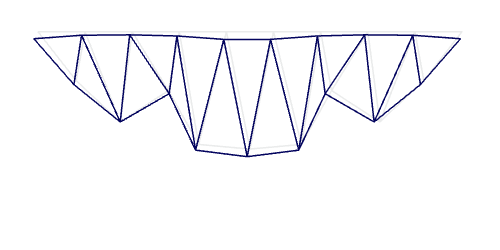

In [10]:
plotTruss(allGraphs[435], showPointLabels=False, showDeformed=True, defScale=100, showUndeformed=True, prediction=None)

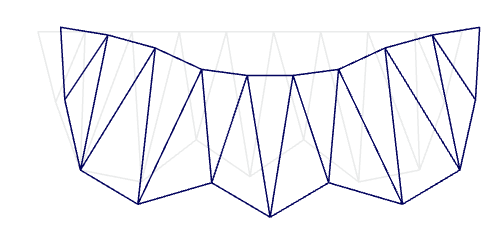

In [11]:
plotTruss(allGraphs[421], showPointLabels=False, showDeformed=True, defScale=100, showUndeformed=True, prediction=None)

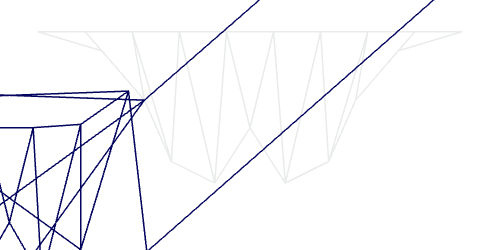

In [12]:
plotTruss(allGraphs[584], showPointLabels=False, showDeformed=True, defScale=100, showUndeformed=True, prediction=None)

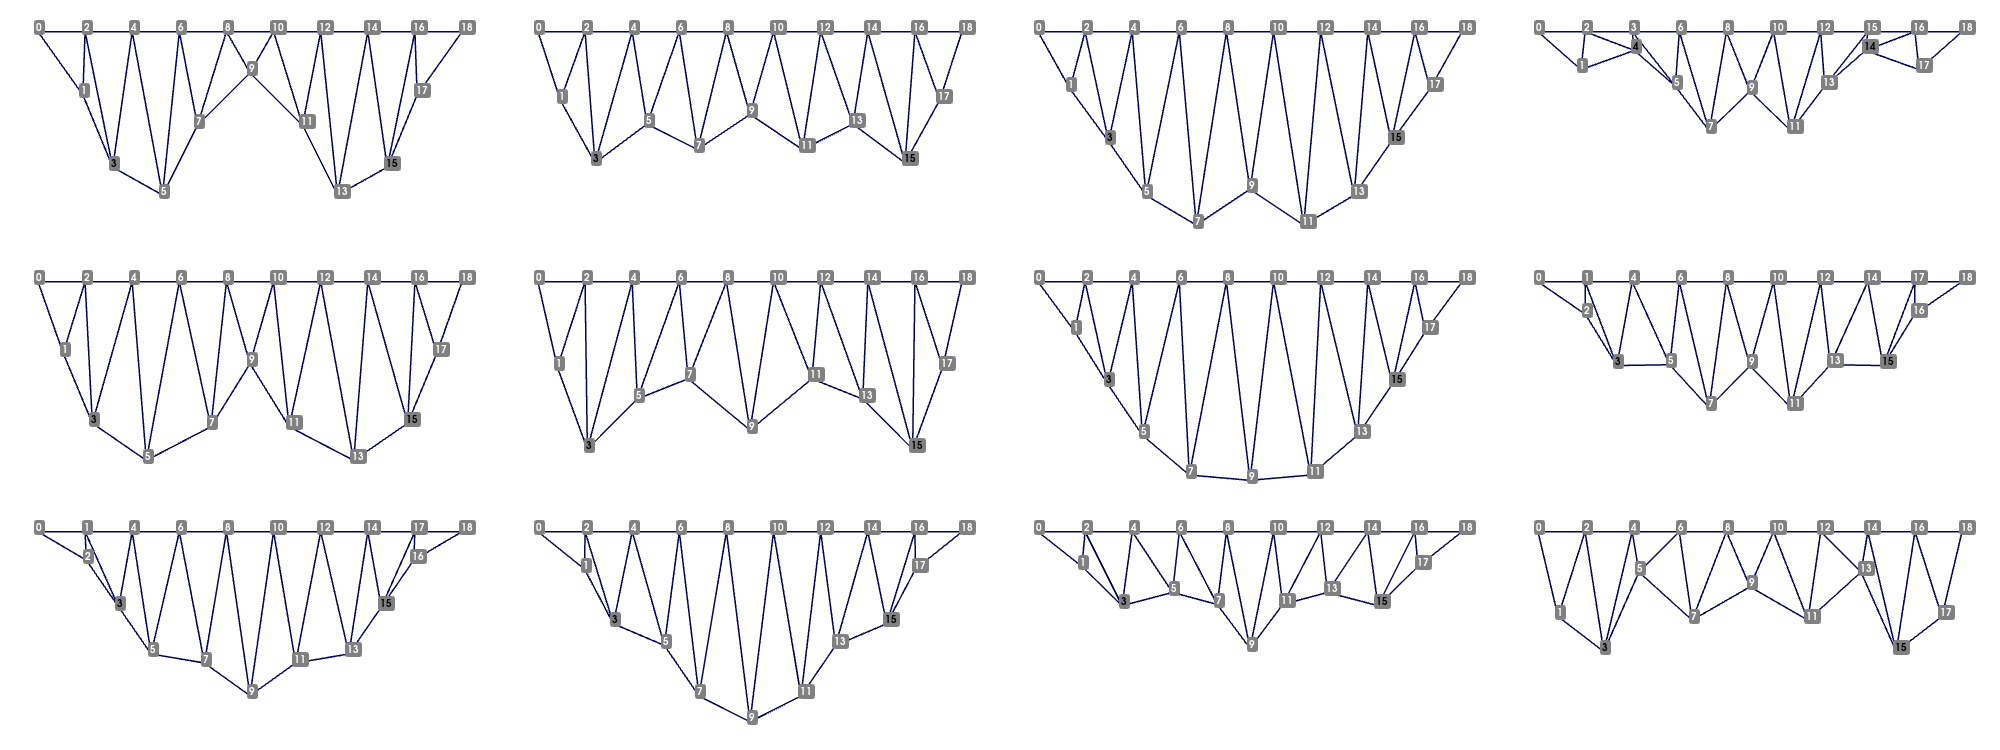

In [13]:
imgList = [plotTruss(g, screenshot=True) for g in allGraphs[:12]]
numCols = 4
numRows = int(np.ceil(len(imgList)/numCols))
h, w, _ = imgList[0].shape
tiledImg = np.empty((h*numRows, w*numCols, 4), dtype='uint8')
for row in range(numRows):
    for col in range(numCols):
        tiledImg[row*h:(row+1)*h,col*w:(col+1)*w] = imgList[row*numCols+col]
Image.fromarray(tiledImg)

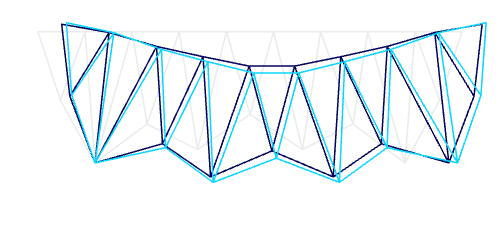

In [14]:
plotTruss(allGraphs[1], showPointLabels=False, showDeformed=True, defScale=100, showUndeformed=True, prediction=allGraphs[1].y*1.2)

In [18]:
from sklearn.model_selection import train_test_split
def filterbyDisp(graphList, pctCutoff):
    maxes = [max(np.abs(graph.y.numpy().flatten())) for graph in allGraphsUnfiltered]
    df = pd.DataFrame(maxes, columns=['maxes'])
    mask = df['maxes'].rank(pct=True) <= pctCutoff
    return [g for g,b in zip(graphList, mask) if b]
def partitionGraphList(allGraphs):
    allIds = list(range(len(allGraphs)))
    other, testIds = train_test_split(allIds, test_size=0.2, shuffle=True, random_state=1234) # 20% test
    trainIds, valIds = train_test_split(other, test_size=0.15, shuffle=True, random_state=1234) # 15% val 15% test
    trainGraphs = [allGraphs[i] for i in trainIds]
    valGraphs = [allGraphs[i] for i in valIds]
    testGraphs = [allGraphs[i] for i in testIds]
    return trainGraphs, valGraphs, testGraphs

doeFile = "C:/Users/ewhalen/OneDrive - Massachusetts Institute of Technology/research/data/trusses/EW/v1.3/design_9_N_1000.csv"
allGraphsUnfiltered = loadGhGraphs(doeFile, NUM_DV=5)
print(f'loaded {len(allGraphsUnfiltered)} graphs')
all9Graphs = filterbyDisp(allGraphsUnfiltered, 0.9)
trainGraphs9, valGraphs9, testGraphs9 = partitionGraphList(all9Graphs)

loaded 1000 graphs


In [19]:
testGraphs9[2].pos

tensor([[ 0.0000,  0.0000],
        [ 2.8686, -5.6026],
        [ 5.5556,  0.0000],
        [ 7.6722, -9.1501],
        [11.1111,  0.0000],
        [13.8066, -9.2771],
        [16.6667,  0.0000],
        [19.2282, -6.5850],
        [22.2222,  0.0000],
        [25.0000, -4.4167],
        [27.7778,  0.0000],
        [30.7718, -6.5850],
        [33.3333,  0.0000],
        [36.1934, -9.2771],
        [38.8889,  0.0000],
        [42.3278, -9.1501],
        [44.4444,  0.0000],
        [47.1314, -5.6026],
        [50.0000,  0.0000]])

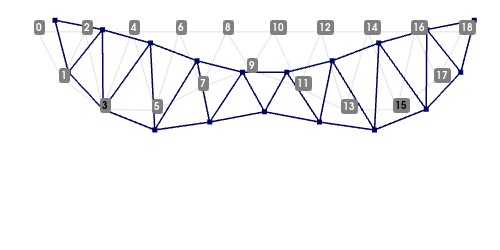

In [20]:
plotTruss(testGraphs9[2], showPointLabels=True, showDeformed=True, defScale=100, showUndeformed=True)